<hr style="border:2px solid gray">

# Algorithm Investigation
*Task:* We will train and evaluate the following five algorithms:
- Support Vector Regression
- Ridge Regression
- Random Forest Regression
- Decision Tree Regression
- Linear Regression

***Contributors***
- Adam
- Hernan
- Carter
<hr style="border:2px solid gray">


### Importing Modules

In [6]:
from airbnb_preperation import airbnb_preperation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

### Importing the prepared data

In [7]:
Xtrain, ytrain, Xdev, ydev, Xtest, ytest = airbnb_preperation('./Data')

Dropped 414 outliers


### Defining helper functions

In [8]:
def run_algorithm(model, name, Xtrain=Xtrain, ytrain=ytrain, Xdev=Xdev, ydev=ydev, params={}):
    '''Trains passed in algorithm and returns performance on train/dev sets'''

    # Training
    model = model(**params)
    model.fit(Xtrain, ytrain)

    # Evaluation
    model_fit_evaulation = {f'{name} Fitting Evaluation':
    {
     'R_squared score (Train)':model.score(Xtrain,ytrain),
     'R_squared score (Dev)':model.score(Xdev,ydev),
     'Mean squared error': mean_squared_error(ydev, model.predict(Xdev))},}
    model_fit_evaulation = pd.DataFrame(model_fit_evaulation)
    return model, model_fit_evaulation

In [9]:
def plot_residuals(Xdev, ydev, model):
    '''Plots the residuals for a given model'''
    residuals = ydev - model.predict(Xdev)
    plt.scatter(np.arange(len(residuals)), residuals, alpha=0.5, s=10, c='orange' )

### Algorithm comparison

##### Support vector regression

In [10]:
%%time
SVR, SVR_eval = run_algorithm(SVR, 'Support Vector Regression')
SVR_eval

CPU times: total: 2min 43s
Wall time: 3min 5s


,Support Vector Regression Fitting Evaluation
Mean squared error,0.017827
R_squared score (Dev),0.723481
R_squared score (Train),0.770274


CPU times: total: 11.4 s
Wall time: 14.8 s


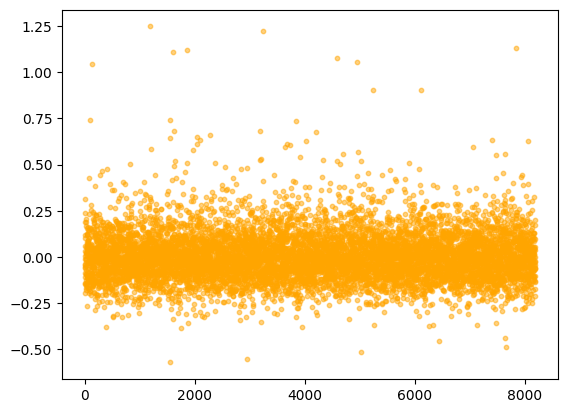

In [11]:
%%time
plot_residuals(Xdev,ydev,SVR)

##### Ridge Regression

In [12]:
RIDGE, RIDGE_eval = run_algorithm(Ridge, 'Ridge Regression')
RIDGE_eval

,Ridge Regression Fitting Evaluation
Mean squared error,0.022455
R_squared score (Dev),0.651690
R_squared score (Train),0.658610


CPU times: total: 15.6 ms
Wall time: 28 ms


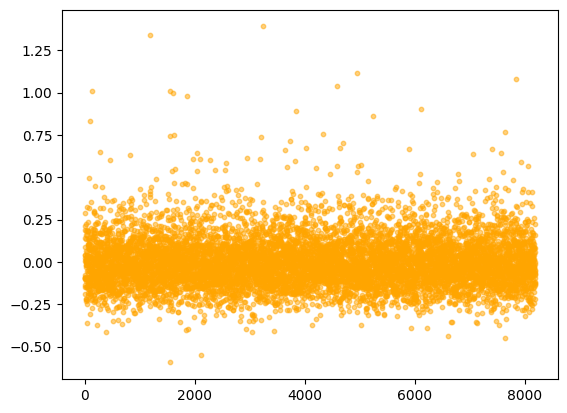

In [13]:
%%time
plot_residuals(Xdev,ydev,RIDGE)

##### Random Forest Regression

In [14]:
RFR, RFR_eval = run_algorithm(RandomForestRegressor, 'Random Forest Regression') #Plot learning curve
RFR_eval

,Random Forest Regression Fitting Evaluation
Mean squared error,0.011754
R_squared score (Dev),0.817672
R_squared score (Train),0.975290


CPU times: total: 172 ms
Wall time: 335 ms


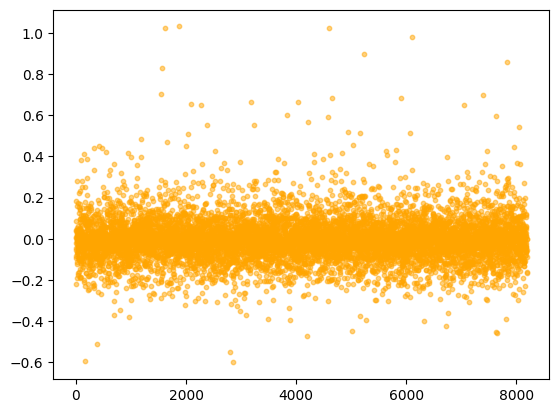

In [15]:
%%time
plot_residuals(Xdev,ydev,RFR)

##### Decision Tree Regression

In [16]:
DTR, DTR_eval = run_algorithm(model=DecisionTreeRegressor, name = 'DecisionTreeRegressor', params= ({'max_depth':5, 'min_samples_leaf':5, 'min_samples_split':5}))
DTR_eval

,DecisionTreeRegressor Fitting Evaluation
Mean squared error,0.025260
R_squared score (Dev),0.608182
R_squared score (Train),0.617459


CPU times: total: 31.2 ms
Wall time: 19 ms


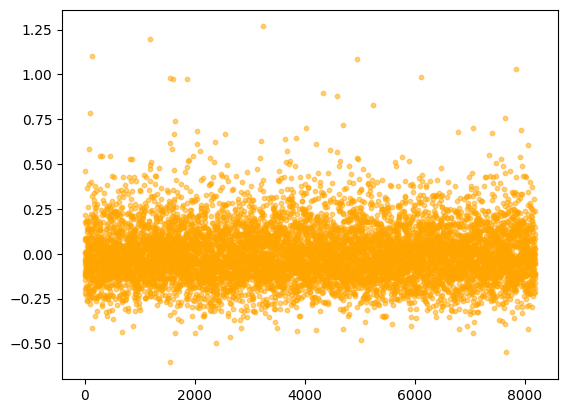

In [17]:
%%time
plot_residuals(Xdev,ydev,DTR)

#### Linear Regression

In [18]:
LR, LR_eval = run_algorithm(model=LinearRegression, name='Linear Regression')
LR_eval

,Linear Regression Fitting Evaluation
Mean squared error,0.022756
R_squared score (Dev),0.647020
R_squared score (Train),0.654597


CPU times: total: 31.2 ms
Wall time: 28 ms


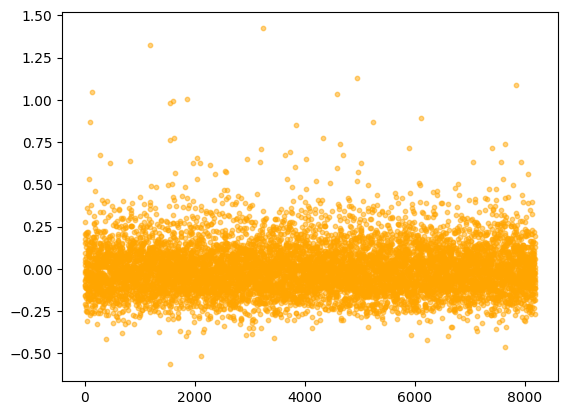

In [19]:
%%time
plot_residuals(Xdev,ydev,LR)

### Conclusion
The two models that performed the best on the dev set were `RandomForestRegressor` and `SVR`. In the next step, we will search for the best hyperparameters for these two models. 

Another thing to note is that each of the models have outlier residuals, where the model underpredicted the price by a large margin. These are likely the luxury rentals, which are priced at thousands of dollars a night. How to deal with these properties is something we will need to consider going forward.